In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

***Data Preprocessing***

In [2]:
trainning_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


***Data validation***

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


***Building Model***

In [21]:
#To avoid Overshooting
#1.Choose small learning rate. Default is 0.001 and im taking 0.0001
#2.There may b chance of underfitting ,so increase the number ofneuron
#3.Add more convolution layer  to extract more feature from images ,there may be possibility that model unable to capture relevent feature
#or model is confusing due to lack of feature so feed with more feature.

In [22]:
from tensorflow.keras.layers import Dense,Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [23]:
model = Sequential()

In [24]:
model.add(Conv2D(filters=32,kernel_size = 3,padding='same', activation = 'relu', input_shape =[128,128,3]))  
model.add(Conv2D(filters=32,kernel_size = 3, activation = 'relu'))  
model.add(MaxPooling2D(pool_size=2, strides =2))

In [25]:
model.add(Conv2D(filters=64,kernel_size = 3,padding='same', activation = 'relu'))  
model.add(Conv2D(filters=64,kernel_size = 3, activation = 'relu'))  
model.add(MaxPooling2D(pool_size=2, strides =2))

In [26]:
model.add(Conv2D(filters=128,kernel_size = 3,padding='same', activation = 'relu'))  
model.add(Conv2D(filters=128,kernel_size = 3, activation = 'relu'))  
model.add(MaxPooling2D(pool_size=2, strides =2))

In [27]:
model.add(Conv2D(filters=256,kernel_size = 3,padding='same', activation = 'relu'))  
model.add(Conv2D(filters=256,kernel_size = 3, activation = 'relu'))  
model.add(MaxPooling2D(pool_size=2, strides =2))

In [28]:
model.add(Conv2D(filters=512,kernel_size = 3,padding='same', activation = 'relu'))  
model.add(Conv2D(filters=512,kernel_size = 3, activation = 'relu'))  
model.add(MaxPooling2D(pool_size=2, strides =2))

In [29]:
model.add(Dropout(0.25)) #To avoid Overfitting

In [30]:
model.add(Flatten())

In [31]:
model.add(Dense(units = 1500,activation = 'relu'))

In [32]:
model.add(Dropout(0.4))

In [33]:
#Output layer
model.add(Dense(units = 38, activation ='softmax'))

In [34]:
#Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss = 'categorical_crossentropy', metrics =['accuracy'])

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                 

***Model Trainning***

In [36]:
training_history = model.fit(x= trainning_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2197/2197 [==============================] - 9521s 4s/step - loss: 1.2925 - accuracy: 0.6183 - val_loss: 0.5042 - val_accuracy: 0.8414
Epoch 2/10
2197/2197 [==============================] - 22237s 10s/step - loss: 0.4316 - accuracy: 0.8618 - val_loss: 0.2979 - val_accuracy: 0.9054
Epoch 3/10
2197/2197 [==============================] - 6566s 3s/step - loss: 0.2564 - accuracy: 0.9167 - val_loss: 0.2176 - val_accuracy: 0.9309
Epoch 4/10
2197/2197 [==============================] - 6706s 3s/step - loss: 0.1771 - accuracy: 0.9426 - val_loss: 0.1856 - val_accuracy: 0.9411
Epoch 5/10
2197/2197 [==============================] - 6802s 3s/step - loss: 0.1322 - accuracy: 0.9571 - val_loss: 0.1651 - val_accuracy: 0.9458
Epoch 6/10
2197/2197 [==============================] - 7484s 3s/step - loss: 0.1068 - accuracy: 0.9644 - val_loss: 0.1365 - val_accuracy: 0.9582
Epoch 7/10
2197/2197 [==============================] - 8333s 4s/step - loss: 0.0833 - accuracy: 0.9723 - val_loss: 0.1520

***Model Evaluation***

In [37]:
train_loss, train_acc = model.evaluate(trainning_set)

2197/2197 [==============================] - 1711s 779ms/step - loss: 0.0583 - accuracy: 0.9796


In [38]:
print(train_loss,train_acc)

0.058293674141168594 0.9795718193054199


In [39]:
val_loss, val_acc = model.evaluate(validation_set)

550/550 [==============================] - 398s 718ms/step - loss: 0.1516 - accuracy: 0.9525


In [40]:
print(val_loss,val_acc)

0.1515873819589615 0.952481210231781


***Saving the model***

In [41]:
model.save("trainned_model.keras")

In [42]:
training_history.history

{'loss': [1.292467713356018,
  0.4315530061721802,
  0.25642645359039307,
  0.17711229622364044,
  0.13220413029193878,
  0.10681226849555969,
  0.08334291726350784,
  0.07124368101358414,
  0.06164837256073952,
  0.05348214879631996],
 'accuracy': [0.6183227896690369,
  0.8618394136428833,
  0.9166796803474426,
  0.9425705671310425,
  0.9570950865745544,
  0.9643644690513611,
  0.9723451137542725,
  0.9772387742996216,
  0.9801550507545471,
  0.9830002188682556],
 'val_loss': [0.5042350888252258,
  0.2978978455066681,
  0.21757133305072784,
  0.18556338548660278,
  0.1651451140642166,
  0.13653133809566498,
  0.15201382339000702,
  0.12209553271532059,
  0.13483625650405884,
  0.15158739686012268],
 'val_accuracy': [0.841395378112793,
  0.9054176807403564,
  0.930855929851532,
  0.9410994648933411,
  0.9457659721374512,
  0.958172082901001,
  0.9526519179344177,
  0.9620987772941589,
  0.9619280695915222,
  0.952481210231781]}

***Recording history***

In [43]:
import json
with open("trainning_his.json","w") as f:
    json.dump(training_history.history,f)

***Accuracy Visualization***

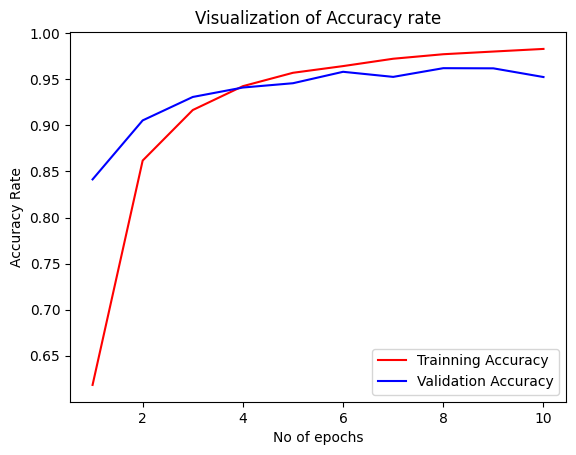

In [49]:
epochs = [i for i in range(1,11)]
plt.plot(epochs, training_history.history['accuracy'], color='red', label ='Trainning Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label ='Validation Accuracy')
plt.xlabel("No of epochs")
plt.ylabel("Accuracy Rate")
plt.title("Visualization of Accuracy rate")
plt.legend()
plt.show()

***Some other metrix for model evaluation***

In [50]:
class_name = validation_set.class_names

In [51]:
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [52]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [53]:
y_pred = model.predict(test_set)
y_pred

550/550 [==============================] - 392s 711ms/step


array([[1.0000000e+00, 8.4624476e-09, 1.6164861e-12, ..., 2.1249836e-17,
        8.3819051e-16, 4.4038307e-16],
       [9.9999094e-01, 6.5718141e-06, 3.4126455e-08, ..., 4.5661597e-13,
        1.5751485e-12, 6.8724249e-12],
       [1.0000000e+00, 9.1465565e-14, 1.0543029e-14, ..., 8.8190150e-23,
        9.5187116e-19, 1.1417248e-18],
       ...,
       [2.3908301e-06, 1.1070188e-06, 1.6431393e-05, ..., 2.0114506e-07,
        3.1811373e-07, 9.9459642e-01],
       [3.2023074e-08, 9.5938200e-09, 1.4544918e-06, ..., 1.1166319e-08,
        2.1922180e-08, 9.9988937e-01],
       [2.6921754e-13, 1.2618243e-12, 3.8662139e-11, ..., 4.2651988e-15,
        8.1895607e-13, 9.9999976e-01]], dtype=float32)

In [54]:
predicted_categories = tf.argmax(y_pred, axis=1)

In [55]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [56]:
true_categories = tf.concat([y for x,y in test_set], axis=0)

In [57]:
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [58]:
y_true = tf.argmax(true_categories, axis=1)

In [59]:
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [63]:
from sklearn.metrics import classification_report, confusion_matrix

In [64]:
print(classification_report(y_true, predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.89      0.98      0.93       504
                                 Apple___Black_rot       0.89      1.00      0.94       497
                          Apple___Cedar_apple_rust       0.96      0.98      0.97       440
                                   Apple___healthy       0.89      0.96      0.92       502
                               Blueberry___healthy       0.92      0.99      0.95       454
          Cherry_(including_sour)___Powdery_mildew       0.97      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.93      0.99      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.81      0.97      0.88       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.85      0.

In [65]:
cm = confusion_matrix(y_true, predicted_categories)

In [67]:
cm, cm.shape

(array([[493,   2,   0, ...,   0,   0,   0],
        [  1, 495,   0, ...,   0,   0,   0],
        [  0,   0, 430, ...,   0,   0,   1],
        ...,
        [  0,   0,   0, ..., 483,   0,   0],
        [  0,   0,   0, ...,   0, 441,   0],
        [  2,   0,   0, ...,   0,   0, 468]], dtype=int64),
 (38, 38))

***Confusion metrix Visualization***

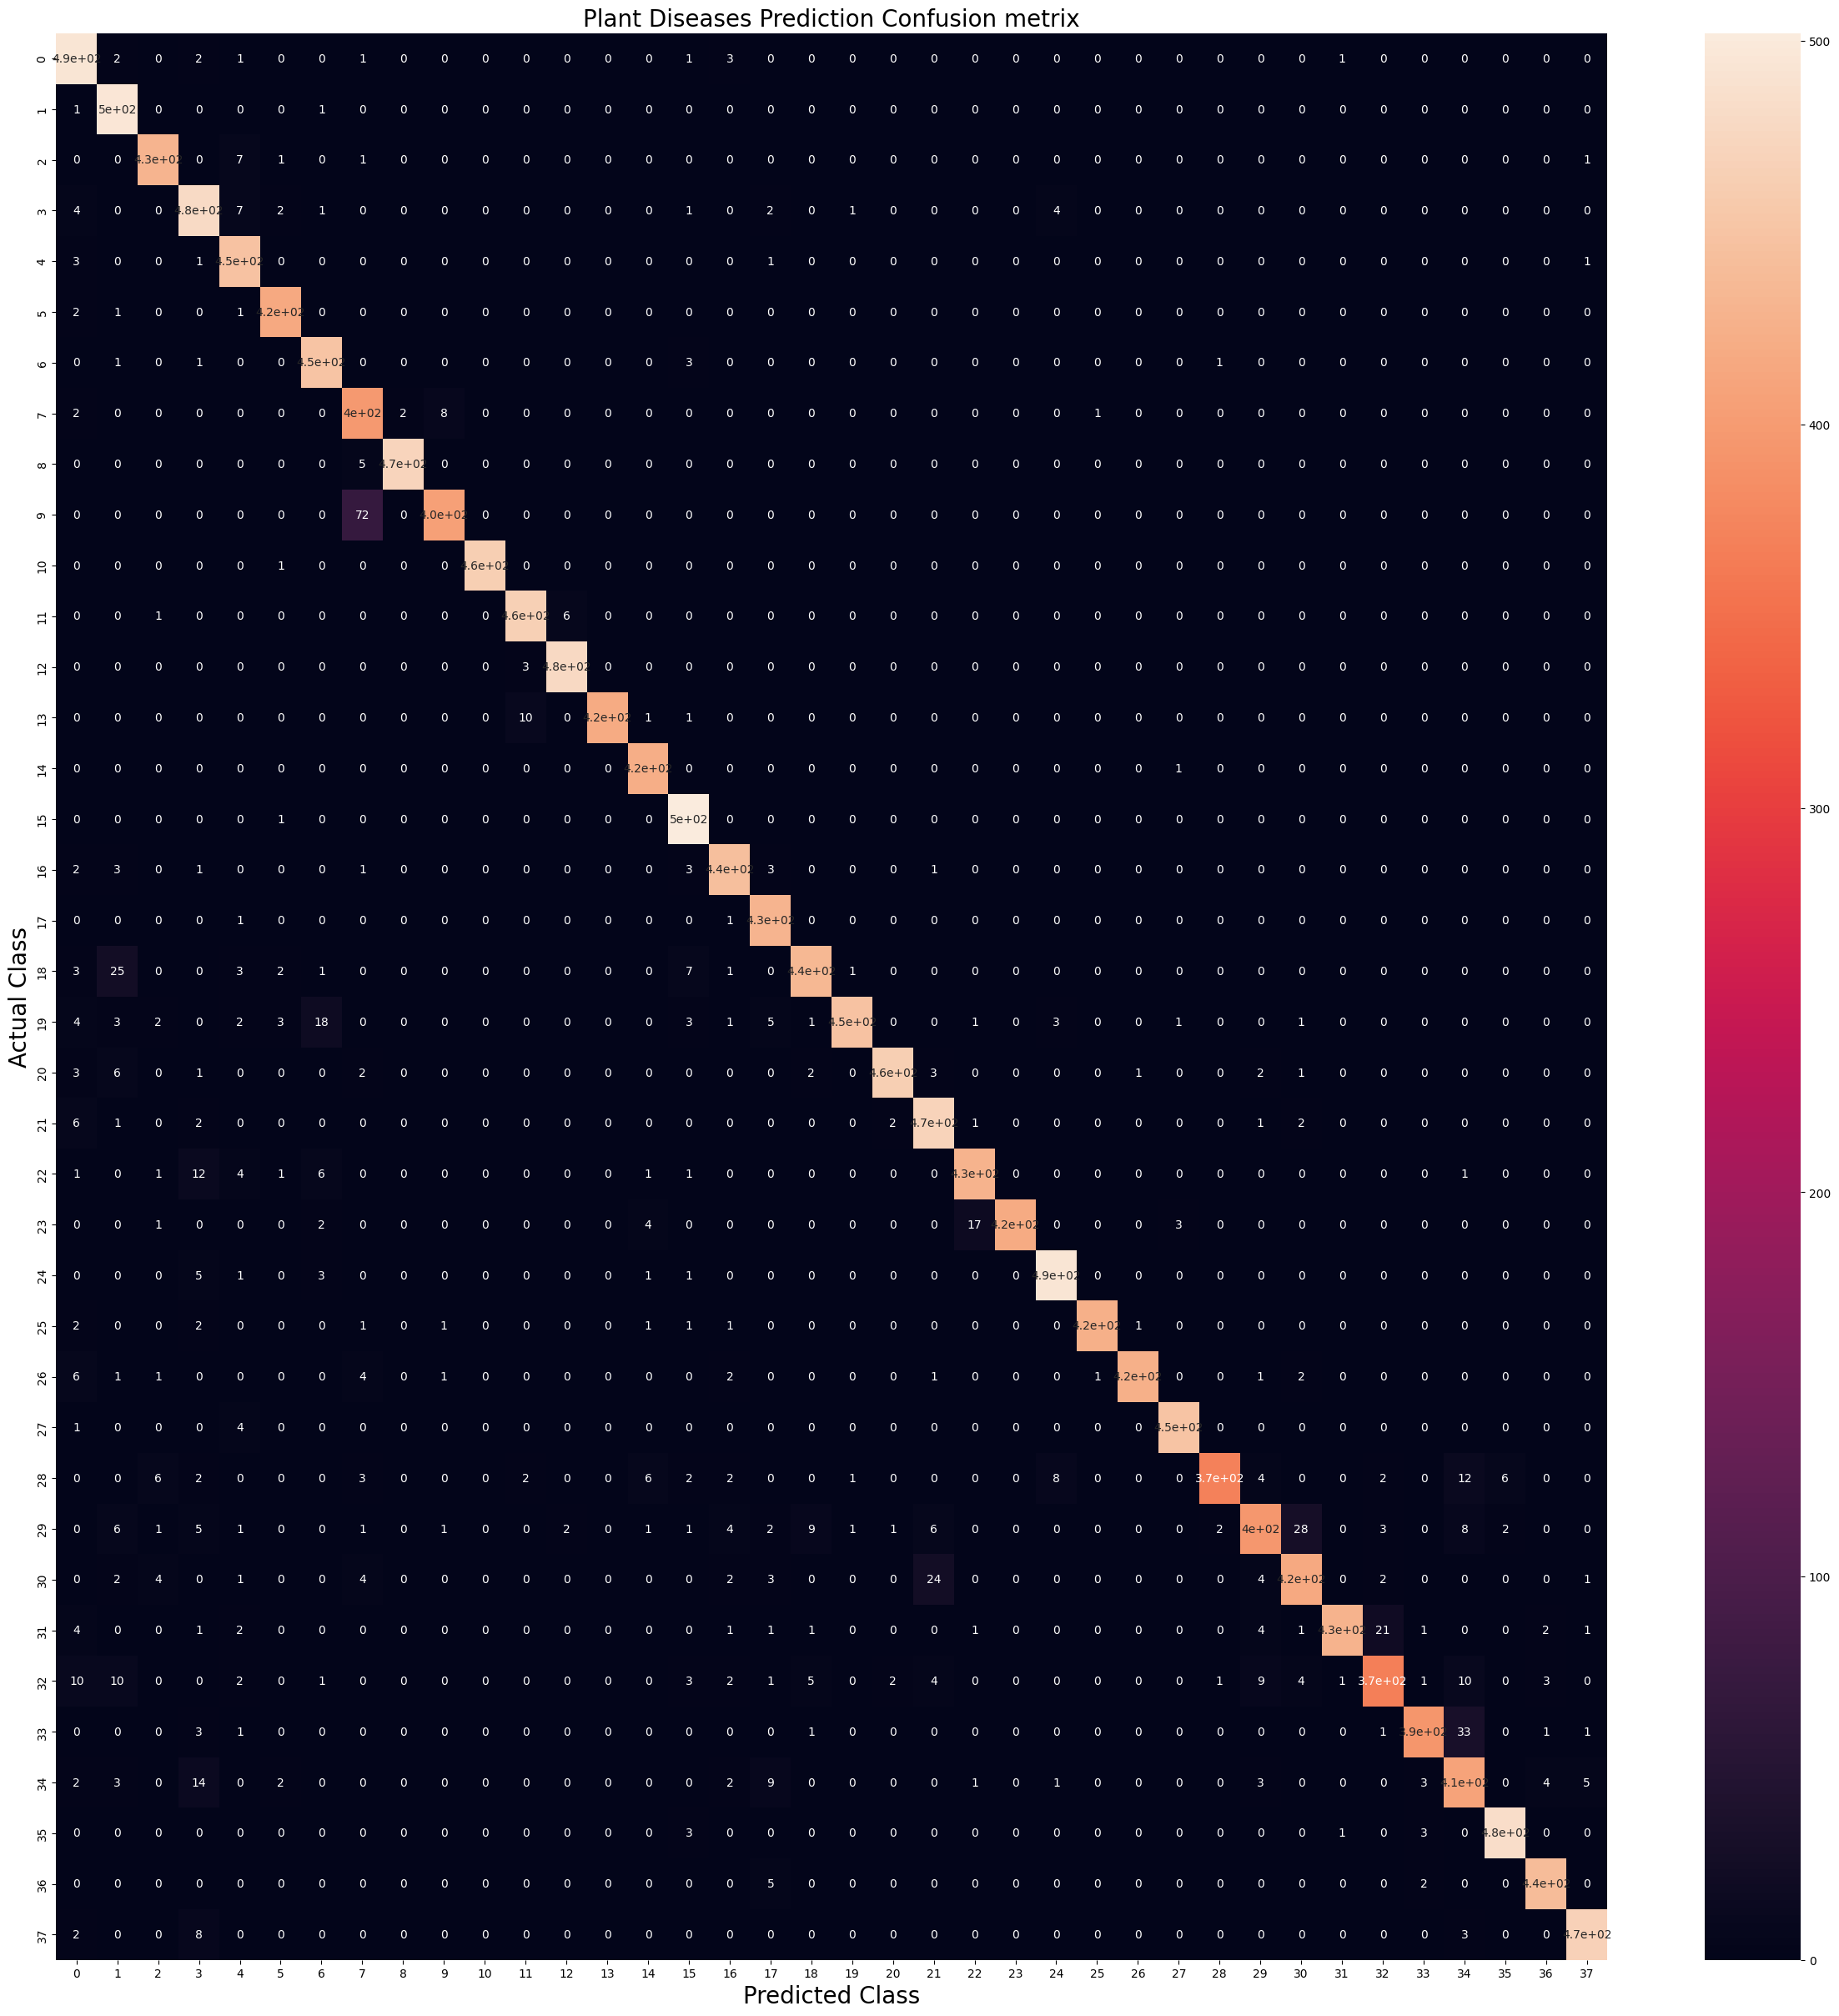

In [78]:
plt.figure(figsize=(30,30))
sns.heatmap(cm, annot=True, annot_kws={'size':10})
plt.xlabel('Predicted Class', fontsize=20)
plt.ylabel('Actual Class', fontsize=20)
plt.title('Plant Diseases Prediction Confusion metrix', fontsize = 20)
plt.show()